#geopandas 

#https://lvis.gsfc.nasa.gov/workshop/LVIS_QGIS_Tutorial_Gabon.pdf

In [2]:
import matplotlib.pyplot 
import numpy as np
import pylab
import pandas as pd
import h5py
import geopandas as gpd
from shapely.geometry import *
from geopandas.geoseries import *

Bring all the data data in 

In [3]:
# Geopandas 

In [4]:
Trees_RH = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\Trees_Closest.shp')

In [5]:
#Changing CRS 
Trees_RH_4326= Trees_RH.to_crs(epsg=4326)

In [6]:
Trees_RH.columns

Index(['Join_Count', 'D_LVIS', 'TARGET_FID', 'plot', 'subplot', 'tree_date',
       'family', 'species', 'wsg', 'tree', 'stem', 'epsg', 'x', 'y', 'status',
       'allom_key', 'a_stem', 'h_t', 'h_t_mod', 'd_stem', 'd_stem_val', 'd_ht',
       'm_agb', 'POINT_X', 'POINT_Y', 'LFID', 'SHOTNUMBER', 'TIME', 'GLON',
       'GLAT', 'ZG', 'HLON', 'HLAT', 'ZH', 'TLON', 'TLAT', 'ZT', 'RH10',
       'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45', 'RH50', 'RH55',
       'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90', 'RH95', 'RH96',
       'RH97', 'RH98', 'RH99', 'RH100', 'AZIMUTH', 'INCIDENTAN', 'RANGE',
       'COMPLEXITY', 'CHANNEL_L1', 'CHANNEL_ZG', 'CHANNEL_RH', 'POINT_X_1',
       'POINT_Y_1', 'Plot_3', 'geometry'],
      dtype='object')

In [7]:
Trees_RH.head(3)

,Join_Count,D_LVIS,TARGET_FID,plot,subplot,tree_date,family,species,wsg,tree,...,INCIDENTAN,RANGE,COMPLEXITY,CHANNEL_L1,CHANNEL_ZG,CHANNEL_RH,POINT_X_1,POINT_Y_1,Plot_3,geometry
0,1,6.424267,1,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6501,...,4.183,7703.11,-999,1,1,1,9.32195,0.554779,None,POINT (535829.680 61322.481)
1,1,7.669181,2,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6502,...,4.183,7703.11,-999,1,1,1,9.32195,0.554779,None,POINT (535827.853 61327.054)
2,1,9.654939,3,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6503,...,4.183,7703.11,-999,1,1,1,9.32195,0.554779,None,POINT (535829.889 61327.977)


In [64]:
subplots = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\Mondah_Field_Data_Plot-0_625ha.shp')

In [65]:
subplots

,plot,subplot,date,vegetation,map,mat,pft_name,latitude,longitude,p_origin,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,NASA01,1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,6.67,5.07,8.63,22,352,0.13,2.05,0.38,12.38,"POLYGON ((535821.018 61316.669, 535821.968 613..."
1,NASA01,10,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,111.79,81.39,150.04,23,368,0.99,15.77,0.47,26.57,"POLYGON ((535871.932 61339.752, 535872.881 613..."
2,NASA01,11,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,38.34,29.57,49.24,30,480,0.43,6.88,0.54,17.62,"POLYGON ((535872.881 61364.734, 535873.831 613..."
3,NASA01,12,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,2.92,2.07,4.06,14,224,0.05,0.85,0.44,11.17,"POLYGON ((535873.831 61389.715, 535874.781 614..."
4,NASA01,13,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,129.24,91.22,181.01,33,528,1.32,21.16,0.42,26.20,"POLYGON ((535924.745 61412.798, 535923.795 613..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,NASA23,5,2016-02-01,TropRF,3096.26,25.64,Water,0.545369,9.316216,C,...,32.72,24.13,43.08,23,368,0.38,6.07,0.52,18.47,"POLYGON ((535185.507 60332.521, 535184.556 603..."
236,NASA23,6,2016-02-01,TropRF,3096.26,25.64,Water,0.545369,9.316216,C,...,95.32,76.27,120.98,63,1008,1.23,19.76,0.42,28.34,"POLYGON ((535184.556 60307.539, 535183.604 602..."
237,NASA23,7,2016-02-01,TropRF,3096.26,25.64,Water,0.545369,9.316216,C,...,232.34,175.54,301.28,43,688,2.02,32.37,0.49,30.04,"POLYGON ((535183.604 60282.557, 535182.652 602..."
238,NASA23,8,2016-02-01,TropRF,3096.26,25.64,Water,0.545369,9.316216,C,...,324.00,238.67,452.69,54,864,2.69,43.06,0.48,36.96,"POLYGON ((535182.652 60257.575, 535181.701 602..."


In [66]:
#Changing CRS 
subplots_4326= subplots.to_crs(epsg=4326)

In [67]:
subplots_4326.columns

Index(['plot', 'subplot', 'date', 'vegetation', 'map', 'mat', 'pft_name',
       'latitude', 'longitude', 'p_origin', 'p_orientat', 'p_shape',
       'p_majoraxi', 'p_minoraxi', 'p_epsg', 'p_area', 'p_mindiam', 'sp_ix',
       'sp_iy', 'dft', 'agb', 'agb_valid', 'agb_lower', 'agb_upper', 'agbd_ha',
       'agbd_ha_lo', 'agbd_ha_up', 'sn', 'snd_ha', 'sba', 'sba_ha', 'swsg_ba',
       'h_t_max', 'geometry'],
      dtype='object')

In [68]:
subplots_4326['subplot'] = subplots_4326['subplot'].astype(str)

In [79]:
subplots_4326['subplot625'] = subplots_4326['plot'] + subplots_4326['subplot']

In [80]:
subplots_4326

,plot,subplot,date,vegetation,map,mat,pft_name,latitude,longitude,p_origin,...,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry,subplot625
0,NASA01,1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,5.07,8.63,22,352,0.13,2.05,0.38,12.38,"POLYGON ((9.32193 0.55474, 9.32194 0.55497, 9....",NASA011
1,NASA01,10,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,81.39,150.04,23,368,0.99,15.77,0.47,26.57,"POLYGON ((9.32239 0.55495, 9.32239 0.55518, 9....",NASA0110
2,NASA01,11,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,29.57,49.24,30,480,0.43,6.88,0.54,17.62,"POLYGON ((9.32239 0.55518, 9.32240 0.55540, 9....",NASA0111
3,NASA01,12,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,2.07,4.06,14,224,0.05,0.85,0.44,11.17,"POLYGON ((9.32240 0.55540, 9.32241 0.55563, 9....",NASA0112
4,NASA01,13,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,91.22,181.01,33,528,1.32,21.16,0.42,26.20,"POLYGON ((9.32286 0.55561, 9.32285 0.55539, 9....",NASA0113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,NASA23,5,2016-02-01,TropRF,3096.26,25.64,Water,0.545369,9.316216,C,...,24.13,43.08,23,368,0.38,6.07,0.52,18.47,"POLYGON ((9.31622 0.54584, 9.31621 0.54561, 9....",NASA235
236,NASA23,6,2016-02-01,TropRF,3096.26,25.64,Water,0.545369,9.316216,C,...,76.27,120.98,63,1008,1.23,19.76,0.42,28.34,"POLYGON ((9.31621 0.54561, 9.31620 0.54539, 9....",NASA236
237,NASA23,7,2016-02-01,TropRF,3096.26,25.64,Water,0.545369,9.316216,C,...,175.54,301.28,43,688,2.02,32.37,0.49,30.04,"POLYGON ((9.31620 0.54539, 9.31619 0.54516, 9....",NASA237
238,NASA23,8,2016-02-01,TropRF,3096.26,25.64,Water,0.545369,9.316216,C,...,238.67,452.69,54,864,2.69,43.06,0.48,36.96,"POLYGON ((9.31619 0.54516, 9.31618 0.54493, 9....",NASA238


In [81]:
subplots_4326.columns

Index(['plot', 'subplot', 'date', 'vegetation', 'map', 'mat', 'pft_name',
       'latitude', 'longitude', 'p_origin', 'p_orientat', 'p_shape',
       'p_majoraxi', 'p_minoraxi', 'p_epsg', 'p_area', 'p_mindiam', 'sp_ix',
       'sp_iy', 'dft', 'agb', 'agb_valid', 'agb_lower', 'agb_upper', 'agbd_ha',
       'agbd_ha_lo', 'agbd_ha_up', 'sn', 'snd_ha', 'sba', 'sba_ha', 'swsg_ba',
       'h_t_max', 'geometry', 'subplot625'],
      dtype='object')

In [82]:
subplots_4326.columns

Index(['plot', 'subplot', 'date', 'vegetation', 'map', 'mat', 'pft_name',
       'latitude', 'longitude', 'p_origin', 'p_orientat', 'p_shape',
       'p_majoraxi', 'p_minoraxi', 'p_epsg', 'p_area', 'p_mindiam', 'sp_ix',
       'sp_iy', 'dft', 'agb', 'agb_valid', 'agb_lower', 'agb_upper', 'agbd_ha',
       'agbd_ha_lo', 'agbd_ha_up', 'sn', 'snd_ha', 'sba', 'sba_ha', 'swsg_ba',
       'h_t_max', 'geometry', 'subplot625'],
      dtype='object')

In [83]:
Trees_RH_subplots = gpd.overlay(Trees_RH_4326,subplots_4326, how = 'intersection')

In [84]:
Trees_RH_subplots

,Join_Count,D_LVIS,TARGET_FID,plot_1,subplot_1,tree_date,family,species,wsg,tree,...,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,subplot625,geometry
0,1,6.424267,1,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6501,...,5.07,8.63,22,352,0.13,2.05,0.38,12.38,NASA011,POINT (9.32201 0.55479)
1,1,7.669181,2,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6502,...,5.07,8.63,22,352,0.13,2.05,0.38,12.38,NASA011,POINT (9.32199 0.55484)
2,1,9.654939,3,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6503,...,5.07,8.63,22,352,0.13,2.05,0.38,12.38,NASA011,POINT (9.32201 0.55484)
3,1,10.448032,4,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6504,...,5.07,8.63,22,352,0.13,2.05,0.38,12.38,NASA011,POINT (9.32201 0.55485)
4,1,7.489962,5,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6505,...,5.07,8.63,22,352,0.13,2.05,0.38,12.38,NASA011,POINT (9.32200 0.55483)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6276,1,4.794827,6628,NASA23,14,2016-02-21,NA,NA,0.534143,3903,...,62.42,147.70,12,192,0.74,11.88,0.53,26.59,NASA2314,POINT (9.31652 0.54556)
6277,1,4.721321,6629,NASA23,14,2016-02-21,NA,NA,0.534143,3904,...,62.42,147.70,12,192,0.74,11.88,0.53,26.59,NASA2314,POINT (9.31652 0.54557)
6278,1,3.696850,6630,NASA23,14,2016-02-21,Myristicaceae,Pycnanthus angolensis,0.408900,3905,...,62.42,147.70,12,192,0.74,11.88,0.53,26.59,NASA2314,POINT (9.31651 0.54557)
6279,1,0.323598,6631,NASA23,14,2016-02-21,Melastomataceae,Dichaetanthera sp.,0.609414,3906,...,62.42,147.70,12,192,0.74,11.88,0.53,26.59,NASA2314,POINT (9.31656 0.54558)


In [85]:
Trees_RH_subplots.columns

Index(['Join_Count', 'D_LVIS', 'TARGET_FID', 'plot_1', 'subplot_1',
       'tree_date', 'family', 'species', 'wsg', 'tree',
       ...
       'agbd_ha_lo', 'agbd_ha_up', 'sn', 'snd_ha', 'sba', 'sba_ha', 'swsg_ba',
       'h_t_max', 'subplot625', 'geometry'],
      dtype='object', length=105)

In [97]:
Trees_RH_subplots['plot_3'] = Trees_RH_subplots['subplot625']

In [98]:
Trees_RH_subplots.columns

Index(['Join_Count', 'D_LVIS', 'TARGET_FID', 'plot_1', 'subplot_1',
       'tree_date', 'family', 'species', 'wsg', 'tree',
       ...
       'agbd_ha_up', 'sn', 'snd_ha', 'sba', 'sba_ha', 'swsg_ba', 'h_t_max',
       'subplot625', 'geometry', 'plot_3'],
      dtype='object', length=106)

In [99]:
#SUM

In [100]:
sum = ['subplot625', 'm_agb']

In [101]:
Trees_RH_sum= Trees_RH_subplots[sum]

In [102]:
Trees_RH_sum = Trees_RH_sum.groupby(by='subplot625').sum('m_agb')

In [103]:
Trees_RH_sum.columns

Index(['m_agb'], dtype='object')

In [104]:
Trees_RH_sum

,m_agb
subplot625,
NASA011,363.48
NASA0110,6904.18
NASA0111,2373.32
NASA0112,105.67
NASA0113,7635.59
...,...
NASA235,1356.43
NASA236,6219.55
NASA237,11498.94


In [105]:
#MEAN

In [106]:
m = ['plot_3','RH10',
       'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45', 'RH50', 'RH55',
       'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90', 'RH95', 'RH96',
       'RH97', 'RH98', 'RH99', 'RH100']

In [107]:
Trees_RH_mean = Trees_RH_subplots[m]

In [108]:
Trees_RH_mean

,plot_3,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,...,RH75,RH80,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100
0,NASA011,-0.22,0.67,1.50,2.24,2.92,3.59,4.19,4.79,5.31,...,7.78,8.22,8.75,9.35,10.39,10.77,11.14,11.74,12.56,14.58
1,NASA011,-0.22,0.67,1.50,2.24,2.92,3.59,4.19,4.79,5.31,...,7.78,8.22,8.75,9.35,10.39,10.77,11.14,11.74,12.56,14.58
2,NASA011,-0.22,0.67,1.50,2.24,2.92,3.59,4.19,4.79,5.31,...,7.78,8.22,8.75,9.35,10.39,10.77,11.14,11.74,12.56,14.58
3,NASA011,-0.22,0.67,1.50,2.24,2.92,3.59,4.19,4.79,5.31,...,7.78,8.22,8.75,9.35,10.39,10.77,11.14,11.74,12.56,14.58
4,NASA011,-0.22,0.67,1.50,2.24,2.92,3.59,4.19,4.79,5.31,...,7.78,8.22,8.75,9.35,10.39,10.77,11.14,11.74,12.56,14.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6276,NASA2314,-4.04,-3.45,-2.92,-2.47,-2.10,-1.72,-1.35,-1.05,-0.68,...,0.82,1.19,1.64,2.17,2.99,3.29,3.59,4.04,4.78,7.25
6277,NASA2314,-3.67,-3.07,-2.55,-2.17,-1.80,-1.42,-1.13,-0.83,-0.53,...,0.82,1.19,1.57,2.09,2.91,3.21,3.51,4.04,4.93,7.10
6278,NASA2314,-3.67,-3.07,-2.55,-2.17,-1.80,-1.42,-1.13,-0.83,-0.53,...,0.82,1.19,1.57,2.09,2.91,3.21,3.51,4.04,4.93,7.10
6279,NASA2314,-4.04,-3.45,-2.92,-2.47,-2.10,-1.72,-1.35,-1.05,-0.68,...,0.82,1.19,1.64,2.17,2.99,3.29,3.59,4.04,4.78,7.25


In [109]:
Trees_RH_mean = Trees_RH_mean.groupby(by='plot_3').mean()

In [110]:
Trees_RH_mean

,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,RH55,...,RH75,RH80,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100
plot_3,,,,,,,,,,,,,,,,,,,,,
NASA011,-0.254000,0.696000,1.559500,2.318500,3.013000,3.690500,4.298000,4.894000,5.414500,6.010500,...,7.869500,8.309500,8.839500,9.443000,10.479500,10.852000,11.222000,11.810500,12.619500,14.624500
NASA0110,-1.873333,-1.533704,-1.246667,-1.008889,-0.781111,-0.615556,-0.447778,-0.256296,-0.090741,0.090000,...,0.856296,1.095926,1.381111,1.729259,2.376296,2.571852,2.839259,3.210370,3.901111,5.428519
NASA0111,-1.858125,-1.530625,-1.252500,-1.012500,-0.785000,-0.617500,-0.447500,-0.266875,-0.099375,0.092500,...,0.852500,1.095625,1.370625,1.733125,2.385000,2.601875,2.891875,3.333750,4.171250,5.894375
NASA0112,-1.848750,-1.526250,-1.252500,-1.012500,-0.785000,-0.617500,-0.447500,-0.271250,-0.103750,0.092500,...,0.847500,1.091250,1.361250,1.728750,2.380000,2.606250,2.906250,3.380000,4.287500,6.101250
NASA0113,-1.712143,-1.241786,-0.882857,-0.572500,-0.242500,0.025357,0.310714,0.682500,1.026786,1.428571,...,3.463214,3.976429,4.679643,5.769286,7.491071,8.370357,9.195714,9.993214,11.017143,12.565000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NASA235,-1.015000,-0.195714,0.585000,1.567143,2.874286,4.345000,5.680714,7.031429,8.617143,9.691429,...,13.795714,15.335000,16.402857,17.319286,18.496429,18.960714,19.798571,21.065000,22.235714,24.468571
NASA236,2.763077,4.306154,5.484038,6.554808,7.719615,8.841538,9.787500,10.749231,11.700000,12.471731,...,15.985192,17.218269,18.424808,19.503269,20.734808,21.073269,21.456346,21.994231,22.919423,25.563077
NASA237,1.466667,3.213000,4.815000,6.088333,7.469667,9.166333,10.631000,11.746000,12.679000,13.545333,...,19.300333,21.001667,22.966333,24.461667,25.969000,26.294000,26.639667,27.105000,27.736667,29.657000


In [111]:
#GEO 

In [112]:
Trees_RH_mean

,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,RH55,...,RH75,RH80,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100
plot_3,,,,,,,,,,,,,,,,,,,,,
NASA011,-0.254000,0.696000,1.559500,2.318500,3.013000,3.690500,4.298000,4.894000,5.414500,6.010500,...,7.869500,8.309500,8.839500,9.443000,10.479500,10.852000,11.222000,11.810500,12.619500,14.624500
NASA0110,-1.873333,-1.533704,-1.246667,-1.008889,-0.781111,-0.615556,-0.447778,-0.256296,-0.090741,0.090000,...,0.856296,1.095926,1.381111,1.729259,2.376296,2.571852,2.839259,3.210370,3.901111,5.428519
NASA0111,-1.858125,-1.530625,-1.252500,-1.012500,-0.785000,-0.617500,-0.447500,-0.266875,-0.099375,0.092500,...,0.852500,1.095625,1.370625,1.733125,2.385000,2.601875,2.891875,3.333750,4.171250,5.894375
NASA0112,-1.848750,-1.526250,-1.252500,-1.012500,-0.785000,-0.617500,-0.447500,-0.271250,-0.103750,0.092500,...,0.847500,1.091250,1.361250,1.728750,2.380000,2.606250,2.906250,3.380000,4.287500,6.101250
NASA0113,-1.712143,-1.241786,-0.882857,-0.572500,-0.242500,0.025357,0.310714,0.682500,1.026786,1.428571,...,3.463214,3.976429,4.679643,5.769286,7.491071,8.370357,9.195714,9.993214,11.017143,12.565000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NASA235,-1.015000,-0.195714,0.585000,1.567143,2.874286,4.345000,5.680714,7.031429,8.617143,9.691429,...,13.795714,15.335000,16.402857,17.319286,18.496429,18.960714,19.798571,21.065000,22.235714,24.468571
NASA236,2.763077,4.306154,5.484038,6.554808,7.719615,8.841538,9.787500,10.749231,11.700000,12.471731,...,15.985192,17.218269,18.424808,19.503269,20.734808,21.073269,21.456346,21.994231,22.919423,25.563077
NASA237,1.466667,3.213000,4.815000,6.088333,7.469667,9.166333,10.631000,11.746000,12.679000,13.545333,...,19.300333,21.001667,22.966333,24.461667,25.969000,26.294000,26.639667,27.105000,27.736667,29.657000


In [113]:
Trees_RH_mean.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_RH_mean.csv')

In [114]:
Trees_RH_mean = pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_RH_mean.csv')

In [115]:
Trees_RH_mean

,plot_3,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,...,RH75,RH80,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100
0,NASA011,-0.254000,0.696000,1.559500,2.318500,3.013000,3.690500,4.298000,4.894000,5.414500,...,7.869500,8.309500,8.839500,9.443000,10.479500,10.852000,11.222000,11.810500,12.619500,14.624500
1,NASA0110,-1.873333,-1.533704,-1.246667,-1.008889,-0.781111,-0.615556,-0.447778,-0.256296,-0.090741,...,0.856296,1.095926,1.381111,1.729259,2.376296,2.571852,2.839259,3.210370,3.901111,5.428519
2,NASA0111,-1.858125,-1.530625,-1.252500,-1.012500,-0.785000,-0.617500,-0.447500,-0.266875,-0.099375,...,0.852500,1.095625,1.370625,1.733125,2.385000,2.601875,2.891875,3.333750,4.171250,5.894375
3,NASA0112,-1.848750,-1.526250,-1.252500,-1.012500,-0.785000,-0.617500,-0.447500,-0.271250,-0.103750,...,0.847500,1.091250,1.361250,1.728750,2.380000,2.606250,2.906250,3.380000,4.287500,6.101250
4,NASA0113,-1.712143,-1.241786,-0.882857,-0.572500,-0.242500,0.025357,0.310714,0.682500,1.026786,...,3.463214,3.976429,4.679643,5.769286,7.491071,8.370357,9.195714,9.993214,11.017143,12.565000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,NASA235,-1.015000,-0.195714,0.585000,1.567143,2.874286,4.345000,5.680714,7.031429,8.617143,...,13.795714,15.335000,16.402857,17.319286,18.496429,18.960714,19.798571,21.065000,22.235714,24.468571
229,NASA236,2.763077,4.306154,5.484038,6.554808,7.719615,8.841538,9.787500,10.749231,11.700000,...,15.985192,17.218269,18.424808,19.503269,20.734808,21.073269,21.456346,21.994231,22.919423,25.563077
230,NASA237,1.466667,3.213000,4.815000,6.088333,7.469667,9.166333,10.631000,11.746000,12.679000,...,19.300333,21.001667,22.966333,24.461667,25.969000,26.294000,26.639667,27.105000,27.736667,29.657000
231,NASA238,2.788913,5.672391,8.356304,10.969348,13.118261,14.770217,16.038913,17.156087,18.300870,...,23.855217,25.102391,26.359348,28.331957,30.785870,31.383043,31.970000,32.693913,33.660652,35.569565


In [116]:
Trees_RH_sum.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_RH_sum.csv')

In [117]:
Trees_RH_sum = pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_RH_sum.csv')

In [118]:
Trees_RH_sum

,subplot625,m_agb
0,NASA011,363.48
1,NASA0110,6904.18
2,NASA0111,2373.32
3,NASA0112,105.67
4,NASA0113,7635.59
...,...,...
228,NASA235,1356.43
229,NASA236,6219.55
230,NASA237,11498.94
231,NASA238,17275.33


In [119]:
#Reducing 

In [120]:
#https://realpython.com/pandas-merge-join-and-concat/

In [122]:
Tree_RH_plot625= Trees_RH_mean.set_index('plot_3').join( Trees_RH_sum.set_index('subplot625'))

In [123]:
Tree_RH_plot625

,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,RH55,...,RH80,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100,m_agb
plot_3,,,,,,,,,,,,,,,,,,,,,
NASA011,-0.254000,0.696000,1.559500,2.318500,3.013000,3.690500,4.298000,4.894000,5.414500,6.010500,...,8.309500,8.839500,9.443000,10.479500,10.852000,11.222000,11.810500,12.619500,14.624500,363.48
NASA0110,-1.873333,-1.533704,-1.246667,-1.008889,-0.781111,-0.615556,-0.447778,-0.256296,-0.090741,0.090000,...,1.095926,1.381111,1.729259,2.376296,2.571852,2.839259,3.210370,3.901111,5.428519,6904.18
NASA0111,-1.858125,-1.530625,-1.252500,-1.012500,-0.785000,-0.617500,-0.447500,-0.266875,-0.099375,0.092500,...,1.095625,1.370625,1.733125,2.385000,2.601875,2.891875,3.333750,4.171250,5.894375,2373.32
NASA0112,-1.848750,-1.526250,-1.252500,-1.012500,-0.785000,-0.617500,-0.447500,-0.271250,-0.103750,0.092500,...,1.091250,1.361250,1.728750,2.380000,2.606250,2.906250,3.380000,4.287500,6.101250,105.67
NASA0113,-1.712143,-1.241786,-0.882857,-0.572500,-0.242500,0.025357,0.310714,0.682500,1.026786,1.428571,...,3.976429,4.679643,5.769286,7.491071,8.370357,9.195714,9.993214,11.017143,12.565000,7635.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NASA235,-1.015000,-0.195714,0.585000,1.567143,2.874286,4.345000,5.680714,7.031429,8.617143,9.691429,...,15.335000,16.402857,17.319286,18.496429,18.960714,19.798571,21.065000,22.235714,24.468571,1356.43
NASA236,2.763077,4.306154,5.484038,6.554808,7.719615,8.841538,9.787500,10.749231,11.700000,12.471731,...,17.218269,18.424808,19.503269,20.734808,21.073269,21.456346,21.994231,22.919423,25.563077,6219.55
NASA237,1.466667,3.213000,4.815000,6.088333,7.469667,9.166333,10.631000,11.746000,12.679000,13.545333,...,21.001667,22.966333,24.461667,25.969000,26.294000,26.639667,27.105000,27.736667,29.657000,11498.94


In [124]:
Tree_RH_plot625.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Tree_RH_plot625.csv')

In [125]:
Tree_RH_plot625 = pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Tree_RH_plot625.csv')

In [126]:
Tree_RH_plot625.columns

Index(['plot_3', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40',
       'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85',
       'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100', 'm_agb'],
      dtype='object')

In [127]:
#TreesRH13_22.columns

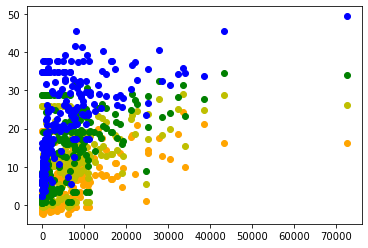

In [128]:
#matplotlib.pyplot.scatter(Trees_RH.m_agb,Trees_RH.ZG,color='r') 
matplotlib.pyplot.scatter(Tree_RH_plot625.m_agb,Tree_RH_plot625.RH25,color='orange') 
matplotlib.pyplot.scatter(Tree_RH_plot625.m_agb,Tree_RH_plot625.RH50,color='y')
matplotlib.pyplot.scatter(Tree_RH_plot625.m_agb,Tree_RH_plot625.RH75,color='g')
matplotlib.pyplot.scatter(Tree_RH_plot625.m_agb,Tree_RH_plot625.RH100,color='b')
matplotlib.pyplot.show()

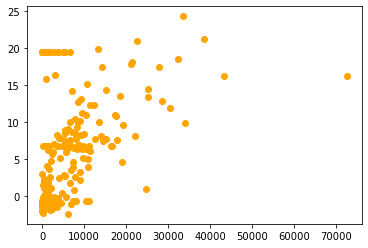

In [129]:
matplotlib.pyplot.scatter(Tree_RH_plot625.m_agb,Tree_RH_plot625.RH25,color='orange')

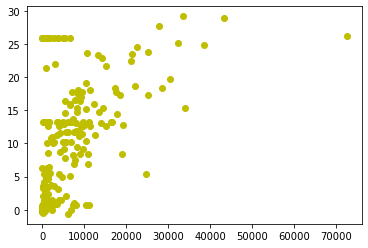

In [130]:
matplotlib.pyplot.scatter(Tree_RH_plot625.m_agb,Tree_RH_plot625.RH50,color='y')

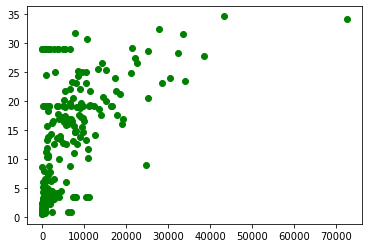

In [131]:
matplotlib.pyplot.scatter(Tree_RH_plot625.m_agb,Tree_RH_plot625.RH75,color='g')

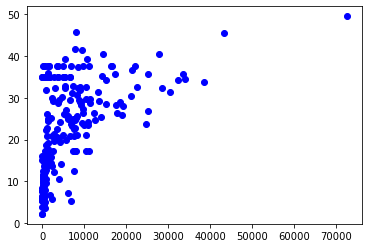

In [132]:
matplotlib.pyplot.scatter(Tree_RH_plot625.m_agb,Tree_RH_plot625.RH100,color='b')